In [14]:
import numpy as np
import random as rd

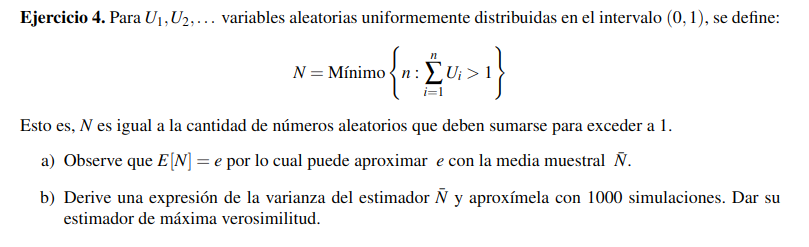

In [3]:
def gen_N():
    n = 0
    acum = 0
    while acum < 1:
        n += 1
        acum += rd.random()
    return n

a) [explicacion](./Aproximaciones%20al%20valor%20de%20e.pdf)

In [16]:
sims = [gen_N() for _ in range(100000)]
print(f"Media muestral de N: {np.mean(sims)}")

Media muestral de N: 2.71443


b)
Sea M la cantidad de simulaciones con la que estimo la Media muestral. Entonces la varianza del estimador $\overline{N}$ es
$$
\overline{N} = \frac{1}{M} \cdot (N_1 + N_2 \cdots N_M)\\
Var[\overline{N}] = Var[\frac{1}{M} \cdot \sum_{i=1}^{M} N_i ]\\
= \frac{1}{M^2} \cdot \sum_{i=1}^{M} Var[N_i] = \frac{1}{M^2} \cdot M \cdot Var[N] = \\
\frac{Var[N]}{M}
$$

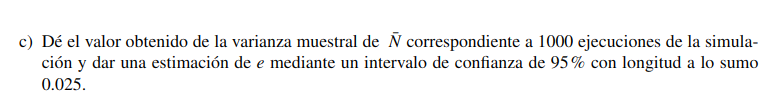

In [56]:
def var_N_barra(nsims = 1000, z_alfa_2 = 1.96, L = 0.025):
    d = L / (2*z_alfa_2)
    media = gen_N() # la media es mi estimador de e
    scuad = 0 # varianza muestal
    n = 1
    while n <= nsims or np.sqrt(scuad/n) > d:
        n += 1
        X = gen_N()
        mediaAnt = media
        media = media + (X - media) / (n)
        scuad = (1 - 1/(n-1)) * scuad + (n)*(media - mediaAnt)**2 # varianza muestral
    
    return media, (scuad*((nsims-1)/nsims))/nsims # media muestral, y varianza de la Media muestral

In [57]:
var_N_barra()

(2.716899323181052, 0.0007684275129466859)